In [13]:
import sys
import os
current_dir = os.path.dirname(os.path.abspath(''))
parent_dir = os.path.dirname(os.path.dirname(os.path.dirname(current_dir)))
sys.path.append(parent_dir)
import streamProps
import math

class Format:
    end = '\033[0m'
    underline = '\033[4m'

In [2]:
print(Format.underline + "COLD STREAMS" + Format.end + "(from ASPEN HYSYS)")
cold1_In = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 110.999991856599, 1.15329*1e5, 4629.89033353505/3600, "R12")
cold1_In.printState()
cold1_Out = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 118.399996544637, 1.10619*1e5, cold1_In.M, "R13")
cold1_Out.printState()

cold2_In = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 102.33977, 7.59865*1e5, 98354.9692775388/3600, "R25")
cold2_In.printState()
cold2_Out = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 111.218525718605, 7.49979*1e5, cold2_In.M, "R26")
cold2_Out.printState()

print(Format.underline + "HOT STREAMS" + Format.end + "(from ASPEN HYSYS)")
mainH2_In = streamProps.ThermoState("TP", "REFPROP::EQHYDROGEN", 113.999999747292, 19.64609*1e5, 10416/3600, "F03")
mainH2_In.x_para = 0.25
print("F03 p-H2 mole fraction: " + str(round(mainH2_In.x_para,3)))
mainH2_In.printState()
mainH2_Out = streamProps.ThermoState("TP", "REFPROP::EQHYDROGEN", 106.0, 19.64609*1e5, mainH2_In.M, "F04")
mainH2_Out.printState()

hot_In = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 119.400, 29.70524*1e5, 102984.859611074/3600, "R02")
hot_In.printState()
hot_Out = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 112.000, 29.60653*1e5, hot_In.M, "R03")
hot_Out.printState()

COLD STREAMS(from ASPEN HYSYS)
Stream R12
M [kg/s]    =  1.2861
P [bar]     =  1.153
T [Kelvin]  =  111.0
H [kJ/kg]   =  1429.679
S [kJ/kg.K] =  39.859


Stream R13
M [kg/s]    =  1.2861
P [bar]     =  1.106
T [Kelvin]  =  118.4
H [kJ/kg]   =  1515.974
S [kJ/kg.K] =  40.784


Stream R25
M [kg/s]    =  27.3208
P [bar]     =  7.599
T [Kelvin]  =  102.34
H [kJ/kg]   =  1321.747
S [kJ/kg.K] =  31.07


Stream R26
M [kg/s]    =  27.3208
P [bar]     =  7.5
T [Kelvin]  =  111.22
H [kJ/kg]   =  1424.869
S [kJ/kg.K] =  32.09


HOT STREAMS(from ASPEN HYSYS)
F03 p-H2 mole fraction: 0.25
Stream F03
M [kg/s]    =  2.8933
P [bar]     =  19.646
T [Kelvin]  =  114.0
H [kJ/kg]   =  1912.063
S [kJ/kg.K] =  36.921


Stream F04
M [kg/s]    =  2.8933
P [bar]     =  19.646
T [Kelvin]  =  106.0
H [kJ/kg]   =  1799.815
S [kJ/kg.K] =  35.9


Stream R02
M [kg/s]    =  28.6069
P [bar]     =  29.705
T [Kelvin]  =  119.4
H [kJ/kg]   =  1501.751
S [kJ/kg.K] =  27.055


Stream R03
M [kg/s]    =  28.6069
P [bar]     =

In [3]:
from scipy.optimize import minimize_scalar

def objective_function(x):
    return abs(cold1_In.M*(cold1_In.H-cold1_Out.H) + x*(cold2_In.H-cold2_Out.H) + hot_In.M*(hot_In.H-hot_Out.H))

res = minimize_scalar(objective_function)
massFlow2A = res.x

cold2A_In = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", cold2_In.T, cold2_In.P, massFlow2A, "R25A")
cold2A_In.printState()
cold2B_In = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", cold2_In.T, cold2_In.P, cold2_In.M-massFlow2A, "R25B")
cold2B_In.printState()

Stream R25A
M [kg/s]    =  24.1751
P [bar]     =  7.599
T [Kelvin]  =  102.34
H [kJ/kg]   =  1321.747
S [kJ/kg.K] =  31.07


Stream R25B
M [kg/s]    =  3.1458
P [bar]     =  7.599
T [Kelvin]  =  102.34
H [kJ/kg]   =  1321.747
S [kJ/kg.K] =  31.07




In [8]:
nParallelHx = 2

lengthPFHX = 1.609
widthPFHX = 1.5000
heightPFHX = 2.000
volumePFHX = lengthPFHX*widthPFHX*heightPFHX

print(Format.underline + "Overall PFHX Geometry" + Format.end)
print("(based on ASPEN EDR)")
print("Length [m]  = ", lengthPFHX)
print("Width  [m]  = ", widthPFHX)
print("Height [m]  = ", heightPFHX)
print("Volume [m3] = ", round(volumePFHX,3))
print("\n")

lengthHXA     = 1.5704
widthHXA      = 1.5000
heightHXA     = 1.3709
volumeHXA     = lengthHXA*widthHXA*heightHXA

print(Format.underline + "HXA Geometry" + Format.end)
print("(based on ASPEN EDR)")
print("Length [m]  = ", lengthHXA)
print("Width  [m]  = ", widthHXA)
print("Height [m]  = ", heightHXA)
print("Volume [m3] = ", round(volumeHXA,3))
print("\n")

volumeHXB     = volumePFHX - volumeHXA
lengthHXB     = lengthPFHX
widthHXB      = widthPFHX
heightHXB     = volumeHXB/(lengthHXB*widthHXB)
print(Format.underline + "HXB Geometry" + Format.end)
print("Length [m]  = ", lengthHXB)
print("Width  [m]  = ", widthHXB)
print("Height [m]  = ", round(heightHXB,3))
print("Volume [m3] = ", round(volumeHXB,3))
print("\n")

Overall PFHX Geometry
(based on ASPEN EDR)
Length [m]  =  1.609
Width  [m]  =  1.5
Height [m]  =  2.0
Volume [m3] =  4.827


HXA Geometry
(based on ASPEN EDR)
Length [m]  =  1.5704
Width  [m]  =  1.5
Height [m]  =  1.3709
Volume [m3] =  3.229


HXB Geometry
Length [m]  =  1.609
Width  [m]  =  1.5
Height [m]  =  0.662
Volume [m3] =  1.598




HX-B Geometry
Length [m]  =  1.609
Width  [m]  =  1.5
Height [m]  =  0.662
Volume [m3] =  1.598

###### Running Simulation ######
   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          1.47e-06       0.00e+00          50              0       
Solved in 1 iterations, number of nodes 50. 
Maximum relative residual: 1.47e-06 
Maximum boundary residual: 0.00e+00


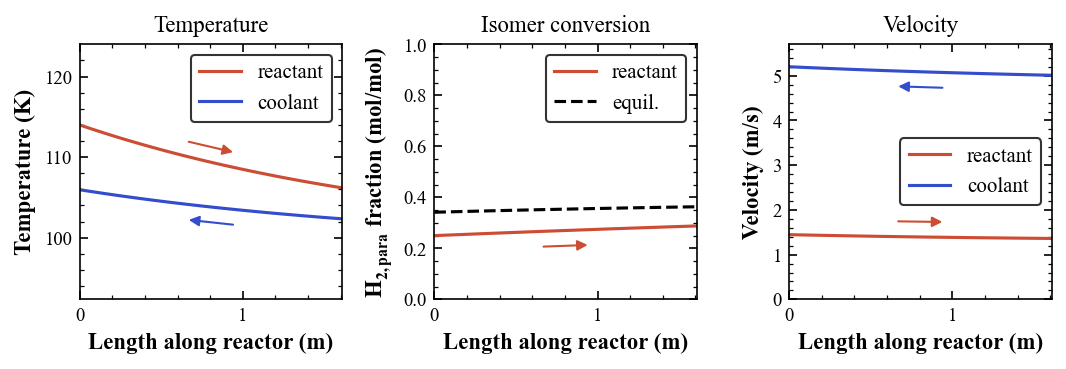

In [9]:
# test for verifying model

### CONFIGURATION ###
configuration = {
    'reactant': {
        'mass_flow_rate': mainH2_In.M*86.4/nParallelHx, # tonne-per-day
        'x_para': mainH2_In.x_para,         # para-hydrogen fraction at inlet
        'temperature': mainH2_In.T,         # inlet temperature (K)
        'pressure': mainH2_In.P/1000        # inlet pressure (kPa)
    },
    'coolant': {
        'fluid': "Hydrogen",          # type of coolant
        'x_para': 0.25,               # normal hydrogen
        'mass_flow_rate': cold2B_In.M*86.4,  # tonne-per-day
        'temperature':  cold2B_In.T,        # temperature of coolant at inlet (K)
        'pressure': cold2B_In.P/1000        # pressure of coolant at inlet (kPa)
    },
    'reactor': {
        'length': lengthHXB,                # m
        'width': widthHXB,                 # m
        'height': heightHXB,                # m
        'fin_thickness': 0.2e-3,      # m
        'fin_height': 8.9e-3,         # m
        'fin_pitch': 1.27e-3,         # m
        'seration_length': 3.0e-3,    # m
        'parting_sheet_thickness': 1.5e-3 # m
    },
    'catalyst': {
        'solid_fraction': 0.31,       # volumetric fraction of catlayst particles within reactor
        'diameter': 424.0e-6,         # mean particle diameter
        'density': 4.0                # solid density of catalyst particles (g/cm3)
    },
    'simulation': {
        'nodes': 50,                  # number of nodes across reactor length to setup
        'tolerance': 1.0e-4,          # tolerance of bvp solver
        'delta_t': 1.0                # initial guess of temperature difference between streams
    }
}

# import packages
import matplotlib
from hydrogen_pfhx import model, outputs

print(Format.underline + "HX-B Geometry" + Format.end)
print("Length [m]  = ", lengthHXB)
print("Width  [m]  = ", widthHXB)
print("Height [m]  = ", round(heightHXB,3))
print("Volume [m3] = ", round(volumeHXB,3))

# run the model with config
print('\n###### Running Simulation ######')
results = model.model(configuration)

# plot & display results!
outputs.plot_results(results)
matplotlib.pyplot.draw()

Final HX-3 Geometry
Length [m]  =  4.0
Width  [m]  =  1.5
Height [m]  =  3.0
Volume [m3] =  18.0


HX-B Geometry
Length [m]  =  4.0
Width  [m]  =  1.5
Height [m]  =  2.462
Volume [m3] =  14.771

###### Running Simulation ######
   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          3.93e-06       0.00e+00          50              0       
Solved in 1 iterations, number of nodes 50. 
Maximum relative residual: 3.93e-06 
Maximum boundary residual: 0.00e+00


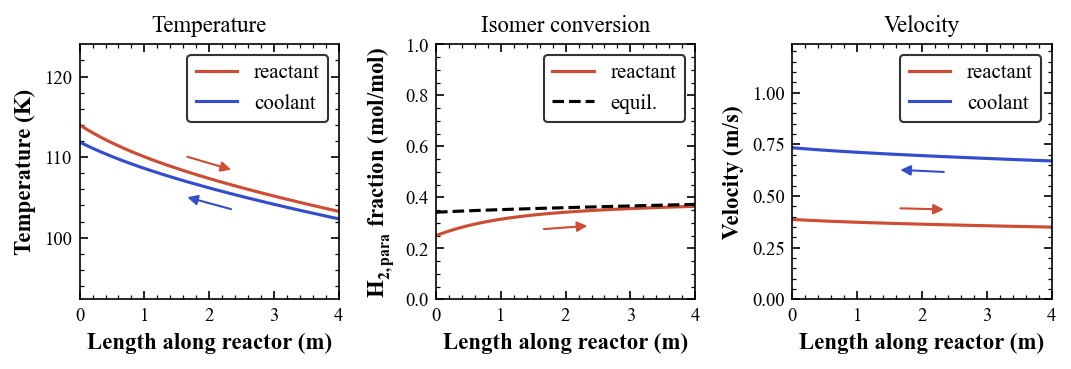

In [12]:
#Adjusted geometry
lengthPFHX = 4.0
widthPFHX = 1.5
heightPFHX = 3.0
volumePFHX = lengthPFHX*widthPFHX*heightPFHX

volumeHXB     = volumePFHX - volumeHXA
lengthHXB     = lengthPFHX
widthHXB      = widthPFHX
heightHXB     = volumeHXB/(lengthHXB*widthHXB)

# test for verifying model

### CONFIGURATION ###
configuration = {
    'reactant': {
        'mass_flow_rate': mainH2_In.M*86.4/nParallelHx, # tonne-per-day
        'x_para': mainH2_In.x_para,         # para-hydrogen fraction at inlet
        'temperature': mainH2_In.T,         # inlet temperature (K)
        'pressure': mainH2_In.P/1000        # inlet pressure (kPa)
    },
    'coolant': {
        'fluid': "Hydrogen",          # type of coolant
        'x_para': 0.25,               # normal hydrogen
        'mass_flow_rate': cold2B_In.M*86.4/nParallelHx,  # tonne-per-day
        'temperature':  cold2B_In.T,        # temperature of coolant at inlet (K)
        'pressure': cold2B_In.P/1000        # pressure of coolant at inlet (kPa)
    },
    'reactor': {
        'length': lengthHXB,                # m
        'width': widthHXB,                 # m
        'height': heightHXB,                # m
        'fin_thickness': 0.2e-3,      # m
        'fin_height': 8.9e-3,         # m
        'fin_pitch': 1.27e-3,         # m
        'seration_length': 3.0e-3,    # m
        'parting_sheet_thickness': 1.5e-3 # m
    },
    'catalyst': {
        'solid_fraction': 0.31,       # volumetric fraction of catlayst particles within reactor
        'diameter': 424.0e-6,         # mean particle diameter
        'density': 4.0                # solid density of catalyst particles (g/cm3)
    },
    'simulation': {
        'nodes': 50,                  # number of nodes across reactor length to setup
        'tolerance': 1.0e-4,          # tolerance of bvp solver
        'delta_t': 1.0                # initial guess of temperature difference between streams
    }
}

# import packages
import matplotlib
from hydrogen_pfhx import model, outputs

print(Format.underline + "Final HX-3 Geometry" + Format.end)
print("Length [m]  = ", lengthPFHX)
print("Width  [m]  = ", widthPFHX)
print("Height [m]  = ", heightPFHX)
print("Volume [m3] = ", round(volumePFHX,3))
print("\n")

print(Format.underline + "HX-B Geometry" + Format.end)
print("Length [m]  = ", lengthHXB)
print("Width  [m]  = ", widthHXB)
print("Height [m]  = ", round(heightHXB,3))
print("Volume [m3] = ", round(volumeHXB,3))

# run the model with config
print('\n###### Running Simulation ######')
results = model.model(configuration)

# plot & display results!
outputs.plot_results(results)
matplotlib.pyplot.draw()

In [14]:
print(results)

       Z (m)  Reactant pressure (kPa)  Coolant pressure (kPa)  \
0   0.000000              1964.609000              759.725827   
1   0.081633              1964.489495              759.728872   
2   0.163265              1964.370474              759.731906   
3   0.244898              1964.251911              759.734927   
4   0.326531              1964.133785              759.737936   
5   0.408163              1964.016075              759.740934   
6   0.489796              1963.898763              759.743922   
7   0.571429              1963.781833              759.746899   
8   0.653061              1963.665270              759.749866   
9   0.734694              1963.549059              759.752823   
10  0.816327              1963.433187              759.755771   
11  0.897959              1963.317644              759.758709   
12  0.979592              1963.202418              759.761639   
13  1.061224              1963.087500              759.764560   
14  1.142857             